## 57 - Pandas CSV and Mapping

Watch video: [YouTube](https://www.youtube.com/watch?v=gorHCYZGow4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from metpy.plots import USCOUNTIES
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('https://www.spc.noaa.gov/climo/reports/180618_rpts_filtered_hail.csv')
df.head()

,Time,Size,Location,County,State,Lat,Lon,Comments
0,1655,125,SOUTH JORDAN,SALT LAKE,UT,40.56,-111.97,(SLC)
1,1715,100,COTTONWOOD HEIGHTS,SALT LAKE,UT,40.61,-111.81,(SLC)
2,1752,100,SALT LAKE CITY,SALT LAKE,UT,40.78,-111.87,TIME IS ESTIMATED. (SLC)
3,1805,200,3 W WESTMINSTER,JEFFERSON,CO,39.88,-105.11,(BOU)
4,1811,100,UNIV OF UTAH,SALT LAKE,UT,40.78,-111.83,(SLC)


In [3]:
proj = ccrs.LambertConformal(central_longitude=255, central_latitude=40)

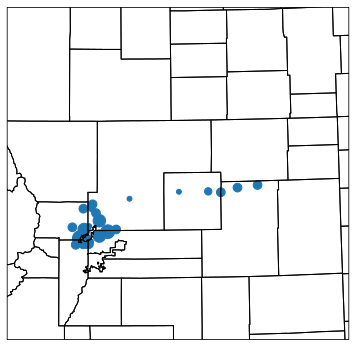

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([254, 258, 39, 42], crs=ccrs.PlateCarree())
ax.add_feature(USCOUNTIES.with_scale('5m'))
ax.scatter(df.Lon, df.Lat, transform=ccrs.PlateCarree(), s=(df.Size / 20) ** 2)
plt.show()